# Obtaining CSV files from Yolo (Linux 4CPU computer)

The fisrt step to predict activities done by our users we will try to detect objects to characterize every image. With this information we will be able to relationate them with the different activities they have done.

For this porpouse we will use [Yolov2](https://pjreddie.com/darknet/yolo/) libraries to dectect the diferents object in the image. Yolo is a pretrained neural network able to detect more than 9000 diferent objects. 

But before to see some Yolo detection example we will take a look to our amount of data to process:

In [2]:
import glob2

u1_directory = 'images/u1/'
u2_directory = 'images/u2/'
u3_directory = 'images/u3/'

u1_files = glob2.glob(u1_directory+'/**/*.jpg')
u2_files = glob2.glob(u2_directory+'/**/*.jpg')
u3_files = glob2.glob(u3_directory+'/**/*.jpg')

print 'User 1: {0} images'.format(len(u1_files))
print 'User 2: {0} images'.format(len(u2_files))
print 'User 3: {0} images'.format(len(u3_files))
print 'TOTAL: {0} images to PROCESS!'.format(len(u1_files)+len(u2_files)+len(u2_files))

User 1: 37140 images
User 2: 24401 images
User 3: 26583 images
TOTAL: 85942 images to PROCESS!


Here an example of list of images to process (sample of 10 files) to take a look to images name names that we will us to get extra information about date, and hour:

In [3]:
images_directory = 'images'
image_files = glob2.glob(images_directory+'/**/*.jpg')
 
print image_files[0:10]

['images/u3/2015-06-20/b00001329_21i79q_20150620_013923e.jpg', 'images/u3/2015-06-20/b00001638_21i79q_20150620_045938e.jpg', 'images/u3/2015-06-20/b00001580_21i79q_20150620_041903e.jpg', 'images/u3/2015-06-20/b00001197_21i79q_20150620_001014e.jpg', 'images/u3/2015-06-20/b00001467_21i79q_20150620_030711e.jpg', 'images/u3/2015-06-20/b00001544_21i79q_20150620_035711e.jpg', 'images/u3/2015-06-20/b00001627_21i79q_20150620_045117e.jpg', 'images/u3/2015-06-20/b00001247_21i79q_20150620_004201e.jpg', 'images/u3/2015-06-20/b00001216_21i79q_20150620_002252e.jpg', 'images/u3/2015-06-20/b00001241_21i79q_20150620_003839e.jpg']


## How we obtain TXT file from Yolo predictions information

To install and configure your Yolo network with a pretrained weight file you only have to run these lines in your terminal:   

``` 
git clone https://github.com/pjreddie/darknet
cd darknet
make

wget https://pjreddie.com/media/files/yolo.weights
```


We had use this python script to process the different imatges in u1 files. In our ubuntu 4 CPU we launched every folder to be done by one CPU each time to optimize processing time. 

In [12]:
%%writefile process_yolo.py

import multiprocessing
import subprocess
import os.path as path
from multiprocessing import Pool
import sys
import glob2

def work(image_file):

    if path.exists(image_file[:-3]+'txt'):
        pass
    else:
        print image_file
        output = subprocess.check_output(['./darknet/darknet', 'detector', 'test', 'cfg/coco.data', 'cfg/yolo.cfg', 'yolo.weights',image_file,'-thresh','0.1'])
        f = open(image_file[:-3]+'txt',"w")
        f.write(output)
        f.close()
        
if __name__ == '__main__':

    if len(sys.argv) == 2:
        
        image_directory = sys.argv[1]
        image_files = glob2.glob(image_directory+'/**/*.jpg')
        
        for image_file in image_files:
            work(image_file)
        
    else:
        "Please enter the image path"

Overwriting process_yolo.py


In [4]:
import subprocess

In [3]:
%%timeit
image_file = 'b00000985_21i79q_20150615_175218e.jpg'
output = subprocess.check_output(['./darknet', 'detector', 'test', 'cfg/coco.data', 'cfg/yolo.cfg', 'yolo.weights',image_file,'-thresh','0.1'])

1 loop, best of 3: 26.8 s per loop


As we caqn see in Yolo scripts (darknet) que use a threshold of 0.1%. This way we obtain all predictions even they are not really good We prefer to hava much information as possible and filter in further steps.

In [24]:
print(output)

b00000985_21i79q_20150615_175218e.jpg: Predicted in 20.504353 seconds.
book: 16%
book: 19%
book: 15%
book: 20%
book: 17%
book: 18%
bottle: 21%
bottle: 10%
book: 10%
book: 23%
book: 15%
person: 66%
person: 27%
person: 14%
chair: 24%
chair: 37%
book: 28%
tvmonitor: 77%
bowl: 54%
diningtable: 42%



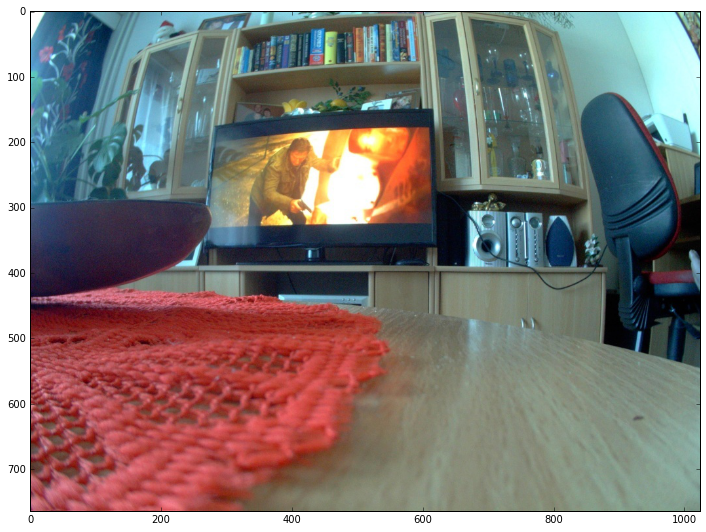

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread(image_file)
plt.figure(figsize=(12,16))
imgplot = plt.imshow(img)

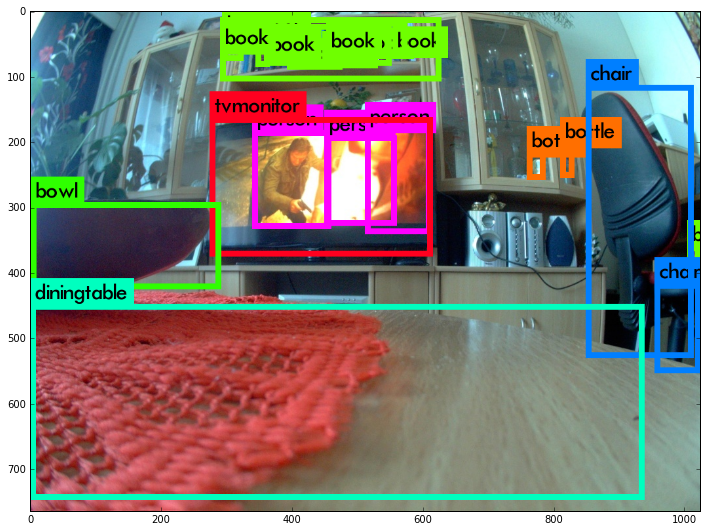

In [20]:
img=mpimg.imread('predictions.png')
plt.figure(figsize=(12,16))
imgplot = plt.imshow(img)

In case of u1 that was processed by 4CPU we obtain a .txt for each image with prediction results as have seen in our examples.